In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
import os 

In [7]:
import logistic_regression
import reduceClasses
import binaryRatio
import train_with_dir
import test 
import get_confidence_interval

In [8]:
NUM_CLASSES = 10
NUM_CLASSES_REDUCED = 2
n_epochs = 20
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5

ratio = (100, 1) # (10, 1)? 

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [9]:
train_mnist = torchvision.datasets.MNIST('mnist', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))


test_mnist = torchvision.datasets.MNIST('mnist', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))]))

In [10]:
reduced_train_mnist = reduceClasses.Reduce(train_mnist, NUM_CLASSES_REDUCED)
reduced_test_mnist = reduceClasses.Reduce(test_mnist, NUM_CLASSES_REDUCED)


reduced_train_mnist_ratio = binaryRatio.Ratio(train_mnist, 2, ratio) 

In [11]:
train_loader_reduced = DataLoader(reduced_train_mnist, batch_size=batch_size_train, shuffle=False) 
train_loader_reduced_ratio = DataLoader(reduced_train_mnist_ratio, batch_size=batch_size_train, shuffle=False)
train_loader_normal = DataLoader(train_mnist, batch_size=batch_size_train, shuffle=False)

test_loader_reduced = DataLoader(reduced_test_mnist, batch_size=batch_size_test, shuffle=False) 
test_loader_normal = DataLoader(test_mnist, batch_size=batch_size_test, shuffle=False)

In [40]:
print(train_mnist.train_labels[train_mnist.train_labels==0].shape)
print(test_mnist.test_labels[test_mnist.test_labels==0].shape)
print(train_mnist.train_labels[train_mnist.train_labels==1].shape)
print(test_mnist.test_labels[test_mnist.test_labels==1].shape)


print(train_mnist.train_labels[train_mnist.train_labels==6].shape)
print(test_mnist.test_labels[test_mnist.test_labels==6].shape)
print(train_mnist.train_labels[train_mnist.train_labels==8].shape)
print(test_mnist.test_labels[test_mnist.test_labels==8].shape)

torch.Size([5923])
torch.Size([980])
torch.Size([6742])
torch.Size([1135])
torch.Size([5918])
torch.Size([958])
torch.Size([5851])
torch.Size([974])


In [15]:
for i in range(10):
    network = logistic_regression.Net(NUM_CLASSES)
    optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
    for epoch in range(n_epochs):
        _, _ = train_with_dir.train(epoch, train_loader_normal, network, optimizer, f'logistic_regression_results/normal{i}/model{epoch}')
        _, _, _ = test.test(test_loader_normal, network)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.391519
Train Epoch: 0 [640/60000 (1%)]	Loss: 1.264056
Train Epoch: 0 [1280/60000 (2%)]	Loss: 0.899669
Train Epoch: 0 [1920/60000 (3%)]	Loss: 0.661826
Train Epoch: 0 [2560/60000 (4%)]	Loss: 0.528469
Train Epoch: 0 [3200/60000 (5%)]	Loss: 0.524239
Train Epoch: 0 [3840/60000 (6%)]	Loss: 0.430666
Train Epoch: 0 [4480/60000 (7%)]	Loss: 0.408026
Train Epoch: 0 [5120/60000 (9%)]	Loss: 0.749220
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.416634
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.408048
Train Epoch: 0 [7040/60000 (12%)]	Loss: 0.414640
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.446291
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.360250
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.369983
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.422143
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.590449
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.299529
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.627557
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.485572
Train Epoch: 0 [12800/60000 (

Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.172809
Train Epoch: 1 [48640/60000 (81%)]	Loss: 0.281974
Train Epoch: 1 [49280/60000 (82%)]	Loss: 0.207006
Train Epoch: 1 [49920/60000 (83%)]	Loss: 0.263407
Train Epoch: 1 [50560/60000 (84%)]	Loss: 0.389676
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.397663
Train Epoch: 1 [51840/60000 (86%)]	Loss: 0.200177
Train Epoch: 1 [52480/60000 (87%)]	Loss: 0.126119
Train Epoch: 1 [53120/60000 (88%)]	Loss: 0.404812
Train Epoch: 1 [53760/60000 (90%)]	Loss: 0.131283
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.264004
Train Epoch: 1 [55040/60000 (92%)]	Loss: 0.245760
Train Epoch: 1 [55680/60000 (93%)]	Loss: 0.383820
Train Epoch: 1 [56320/60000 (94%)]	Loss: 0.202636
Train Epoch: 1 [56960/60000 (95%)]	Loss: 0.300903
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.442992
Train Epoch: 1 [58240/60000 (97%)]	Loss: 0.124083
Train Epoch: 1 [58880/60000 (98%)]	Loss: 0.055349
Train Epoch: 1 [59520/60000 (99%)]	Loss: 0.066162

Test set: Avg. loss: 0.0003, Accuracy: 9123/10000

Train Epoch: 3 [33920/60000 (57%)]	Loss: 0.138774
Train Epoch: 3 [34560/60000 (58%)]	Loss: 0.283136
Train Epoch: 3 [35200/60000 (59%)]	Loss: 0.308743
Train Epoch: 3 [35840/60000 (60%)]	Loss: 0.233359
Train Epoch: 3 [36480/60000 (61%)]	Loss: 0.233128
Train Epoch: 3 [37120/60000 (62%)]	Loss: 0.396185
Train Epoch: 3 [37760/60000 (63%)]	Loss: 0.264195
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.184802
Train Epoch: 3 [39040/60000 (65%)]	Loss: 0.142904
Train Epoch: 3 [39680/60000 (66%)]	Loss: 0.287818
Train Epoch: 3 [40320/60000 (67%)]	Loss: 0.272144
Train Epoch: 3 [40960/60000 (68%)]	Loss: 0.440608
Train Epoch: 3 [41600/60000 (69%)]	Loss: 0.194314
Train Epoch: 3 [42240/60000 (70%)]	Loss: 0.213023
Train Epoch: 3 [42880/60000 (71%)]	Loss: 0.349038
Train Epoch: 3 [43520/60000 (72%)]	Loss: 0.329433
Train Epoch: 3 [44160/60000 (74%)]	Loss: 0.167231
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.386107
Train Epoch: 3 [45440/60000 (76%)]	Loss: 0.609218
Train Epoch: 3 [46080/60000 (77%)]	Loss: 0.463032


KeyboardInterrupt: 

In [ ]:
for i in range(10):
    network = logistic_regression.Net(NUM_CLASSES_REDUCED)
    optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
    for epoch in range(n_epochs):
        _, _ = train_with_dir.train(epoch, train_loader_reduced, network, optimizer, f'logistic_regression_results/reduced{i}/model{epoch}')
        _, _, _ = test.test(test_loader_reduced, network)

In [ ]:
for i in range(10):
    network = logistic_regression.Net(NUM_CLASSES_REDUCED)
    optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
    for epoch in range(n_epochs): 
        _, _ = train_with_dir.train(epoch, train_loader_reduced_ratio, network, optimizer, f'logistic_regression_results/reduced_ratio{i}/model{epoch}')
        _, _, _ = test.test(test_loader_reduced, network)
        


Test set: Avg. loss: 0.0417, Accuracy: 990/2115 (47%)



/Users/caralee/Downloads/ML/numbers mnist/get_confidence_interval.py:5: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  y_pred = np.asarray(y_pred)
/Users/caralee/Downloads/ML/numbers mnist/get_confidence_interval.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.asarray(y_pred)


Accuracy: 0.46808510638297873 [0.448 - 0.491]

Test set: Avg. loss: 0.0433, Accuracy: 2105/2115 (100%)

Accuracy: 0.9952718676122931 [0.992 - 0.998]

Test set: Avg. loss: 0.0059, Accuracy: 2110/2115 (100%)

Accuracy: 0.9976359338061466 [0.995 - 1.0]

Test set: Avg. loss: 0.0404, Accuracy: 2104/2115 (99%)

Accuracy: 0.9947990543735225 [0.991 - 0.998]

Test set: Avg. loss: 0.1013, Accuracy: 2092/2115 (99%)

Accuracy: 0.9891252955082742 [0.985 - 0.993]

Test set: Avg. loss: 0.1280, Accuracy: 2092/2115 (99%)

Accuracy: 0.9891252955082742 [0.985 - 0.993]

Test set: Avg. loss: 0.1280, Accuracy: 2092/2115 (99%)

Accuracy: 0.9891252955082742 [0.985 - 0.993]

Test set: Avg. loss: 0.1280, Accuracy: 2092/2115 (99%)

Accuracy: 0.9891252955082742 [0.985 - 0.993]

Test set: Avg. loss: 0.1280, Accuracy: 2092/2115 (99%)

Accuracy: 0.9891252955082742 [0.985 - 0.993]

Test set: Avg. loss: 0.1280, Accuracy: 2092/2115 (99%)

Accuracy: 0.9891252955082742 [0.985 - 0.993]

Test set: Avg. loss: 0.1280, Accura

Accuracy: 0.9877068557919622 [0.983 - 0.992]

Test set: Avg. loss: 0.1651, Accuracy: 2089/2115 (99%)

Accuracy: 0.9877068557919622 [0.983 - 0.992]

Test set: Avg. loss: 0.1651, Accuracy: 2089/2115 (99%)

Accuracy: 0.9877068557919622 [0.983 - 0.992]

Test set: Avg. loss: 0.0305, Accuracy: 965/2115 (46%)

Accuracy: 0.4562647754137116 [0.434 - 0.478]

Test set: Avg. loss: 0.0084, Accuracy: 2111/2115 (100%)

Accuracy: 0.9981087470449173 [0.996 - 1.0]

Test set: Avg. loss: 0.0017, Accuracy: 2112/2115 (100%)

Accuracy: 0.9985815602836879 [0.997 - 1.0]

Test set: Avg. loss: 0.0300, Accuracy: 2105/2115 (100%)

Accuracy: 0.9952718676122931 [0.992 - 0.998]

Test set: Avg. loss: 0.0884, Accuracy: 2092/2115 (99%)

Accuracy: 0.9891252955082742 [0.985 - 0.993]

Test set: Avg. loss: 0.1151, Accuracy: 2088/2115 (99%)

Accuracy: 0.9872340425531915 [0.983 - 0.992]

Test set: Avg. loss: 0.1151, Accuracy: 2088/2115 (99%)

Accuracy: 0.9872340425531915 [0.983 - 0.992]

Test set: Avg. loss: 0.1151, Accuracy:

Accuracy: 0.9891252955082742 [0.984 - 0.993]

Test set: Avg. loss: 0.0596, Accuracy: 2092/2115 (99%)

Accuracy: 0.9891252955082742 [0.984 - 0.993]

Test set: Avg. loss: 0.0596, Accuracy: 2092/2115 (99%)

Accuracy: 0.9891252955082742 [0.984 - 0.993]

Test set: Avg. loss: 0.0596, Accuracy: 2092/2115 (99%)

Accuracy: 0.9891252955082742 [0.984 - 0.993]

Test set: Avg. loss: 0.0596, Accuracy: 2092/2115 (99%)

Accuracy: 0.9891252955082742 [0.984 - 0.993]

Test set: Avg. loss: 0.0596, Accuracy: 2092/2115 (99%)

Accuracy: 0.9891252955082742 [0.984 - 0.993]

Test set: Avg. loss: 0.0432, Accuracy: 998/2115 (47%)

Accuracy: 0.4718676122931442 [0.452 - 0.495]

Test set: Avg. loss: 0.0127, Accuracy: 2111/2115 (100%)

Accuracy: 0.9981087470449173 [0.996 - 1.0]

Test set: Avg. loss: 0.0031, Accuracy: 2109/2115 (100%)

Accuracy: 0.9971631205673759 [0.995 - 0.999]

Test set: Avg. loss: 0.0245, Accuracy: 2098/2115 (99%)

Accuracy: 0.9919621749408983 [0.988 - 0.995]

Test set: Avg. loss: 0.0451, Accuracy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.9881796690307328 [0.984 - 0.993]


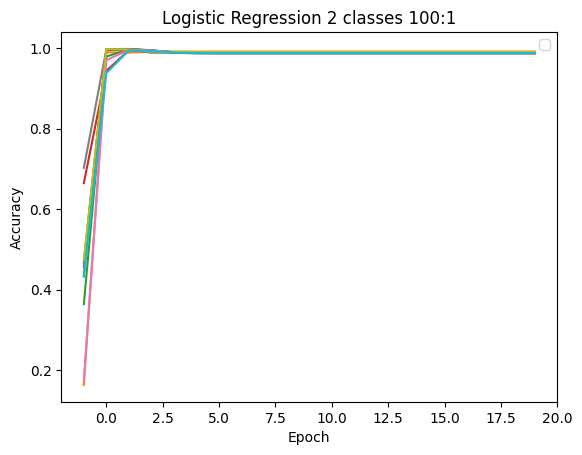

In [16]:
accuracies = []
for i in range(10):
    model_accuracies = []
    network = logistic_regression.Net(NUM_CLASSES_REDUCED)
    _, y_preds, y_true = test.test(test_loader_reduced, network) 
    _, _, acc = get_confidence_interval.get_confidence_interval(y_preds, y_true)
    model_accuracies.append(acc)
    for epoch in range(n_epochs):
        state_dict = torch.load(f'logistic_regression_results/reduced_ratio{i}/model{epoch}')
        network.load_state_dict(state_dict)
        _, y_preds, y_true = test.test(test_loader_reduced, network) 
        _, _, acc = get_confidence_interval.get_confidence_interval(y_preds, y_true)
        model_accuracies.append(acc)
    accuracies.append(model_accuracies)
    
for i in range(10):
    plt.plot(np.arange(-1, n_epochs), accuracies[i])
plt.title("Logistic Regression 2 classes 100:1")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend() 


Test set: Avg. loss: 0.1457, Accuracy: 4/2115 (0%)

Accuracy: 0.0018912529550827422 [0.000 - 0.00378]

Test set: Avg. loss: 0.0003, Accuracy: 9063/10000 (91%)

Accuracy: 0.9063 [0.900 - 0.912]

Test set: Avg. loss: 0.0003, Accuracy: 9123/10000 (91%)

Accuracy: 0.9123 [0.906 - 0.918]

Test set: Avg. loss: 0.0003, Accuracy: 9148/10000 (91%)

Accuracy: 0.9148 [0.909 - 0.92]

Test set: Avg. loss: 0.0003, Accuracy: 9159/10000 (92%)

Accuracy: 0.9159 [0.910 - 0.921]

Test set: Avg. loss: 0.0003, Accuracy: 9172/10000 (92%)

Accuracy: 0.9172 [0.912 - 0.923]

Test set: Avg. loss: 0.0003, Accuracy: 9181/10000 (92%)

Accuracy: 0.9181 [0.913 - 0.923]

Test set: Avg. loss: 0.0003, Accuracy: 9188/10000 (92%)

Accuracy: 0.9188 [0.913 - 0.924]

Test set: Avg. loss: 0.0003, Accuracy: 9189/10000 (92%)

Accuracy: 0.9189 [0.914 - 0.924]

Test set: Avg. loss: 0.0003, Accuracy: 9190/10000 (92%)

Accuracy: 0.919 [0.914 - 0.924]

Test set: Avg. loss: 0.0003, Accuracy: 9194/10000 (92%)

Accuracy: 0.9194 [0.91

Accuracy: 0.9172 [0.912 - 0.922]

Test set: Avg. loss: 0.0003, Accuracy: 9176/10000 (92%)

Accuracy: 0.9176 [0.912 - 0.923]

Test set: Avg. loss: 0.0003, Accuracy: 9179/10000 (92%)

Accuracy: 0.9179 [0.913 - 0.923]

Test set: Avg. loss: 0.0003, Accuracy: 9180/10000 (92%)

Accuracy: 0.918 [0.913 - 0.923]

Test set: Avg. loss: 0.0003, Accuracy: 9180/10000 (92%)

Accuracy: 0.918 [0.913 - 0.923]

Test set: Avg. loss: 0.0003, Accuracy: 9185/10000 (92%)

Accuracy: 0.9185 [0.913 - 0.924]

Test set: Avg. loss: 0.0003, Accuracy: 9189/10000 (92%)

Accuracy: 0.9189 [0.914 - 0.924]

Test set: Avg. loss: 0.0003, Accuracy: 9194/10000 (92%)

Accuracy: 0.9194 [0.914 - 0.925]

Test set: Avg. loss: 0.0003, Accuracy: 9193/10000 (92%)

Accuracy: 0.9193 [0.914 - 0.925]

Test set: Avg. loss: 0.0003, Accuracy: 9196/10000 (92%)

Accuracy: 0.9196 [0.914 - 0.925]

Test set: Avg. loss: 0.0003, Accuracy: 9204/10000 (92%)

Accuracy: 0.9204 [0.915 - 0.926]

Test set: Avg. loss: 0.0003, Accuracy: 9204/10000 (92%)

A

Accuracy: 0.9202 [0.915 - 0.925]

Test set: Avg. loss: 0.0003, Accuracy: 9200/10000 (92%)

Accuracy: 0.92 [0.915 - 0.925]

Test set: Avg. loss: 0.0003, Accuracy: 9203/10000 (92%)

Accuracy: 0.9203 [0.915 - 0.925]

Test set: Avg. loss: 0.0003, Accuracy: 9205/10000 (92%)

Accuracy: 0.9205 [0.915 - 0.926]

Test set: Avg. loss: 0.0003, Accuracy: 9205/10000 (92%)

Accuracy: 0.9205 [0.915 - 0.926]

Test set: Avg. loss: 0.0003, Accuracy: 9206/10000 (92%)

Accuracy: 0.9206 [0.915 - 0.926]

Test set: Avg. loss: 0.0003, Accuracy: 9210/10000 (92%)

Accuracy: 0.921 [0.916 - 0.926]

Test set: Avg. loss: 0.0003, Accuracy: 9214/10000 (92%)

Accuracy: 0.9214 [0.916 - 0.927]

Test set: Avg. loss: 0.0003, Accuracy: 9216/10000 (92%)

Accuracy: 0.9216 [0.916 - 0.927]

Test set: Avg. loss: 0.0003, Accuracy: 9214/10000 (92%)

Accuracy: 0.9214 [0.916 - 0.927]

Test set: Avg. loss: 0.1120, Accuracy: 128/2115 (6%)

Accuracy: 0.06052009456264775 [0.050 - 0.0709]

Test set: Avg. loss: 0.0003, Accuracy: 9071/1000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.9211 [0.916 - 0.926]


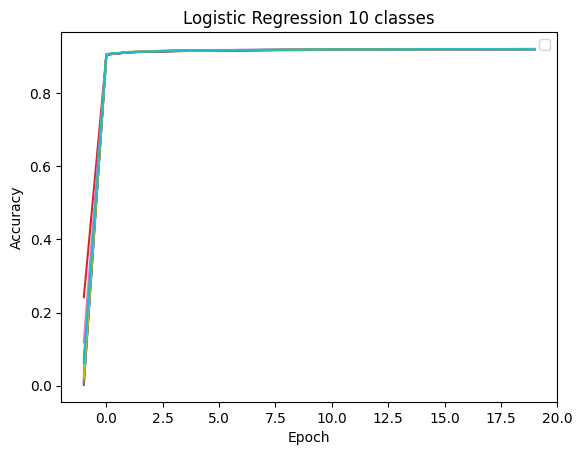

In [17]:
accuracies = []
for i in range(10):
    model_accuracies = []
    network = logistic_regression.Net(NUM_CLASSES)
    _, y_preds, y_true = test.test(test_loader_reduced, network) 
    _, _, acc = get_confidence_interval.get_confidence_interval(y_preds, y_true)
    model_accuracies.append(acc)
    for epoch in range(n_epochs):
        state_dict = torch.load(f'logistic_regression_results/normal{i}/model{epoch}')
        network.load_state_dict(state_dict)
        _, y_preds, y_true = test.test(test_loader_normal, network) 
        _, _, acc = get_confidence_interval.get_confidence_interval(y_preds, y_true)
        model_accuracies.append(acc)
    accuracies.append(model_accuracies)


for i in range(10):
    plt.plot(np.arange(-1, n_epochs), accuracies[i])
plt.title("Logistic Regression 10 classes")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend() 


Test set: Avg. loss: 0.0217, Accuracy: 1376/2115 (65%)

Accuracy: 0.6505910165484634 [0.632 - 0.671]

Test set: Avg. loss: 0.0004, Accuracy: 2114/2115 (100%)

Accuracy: 0.9995271867612293 [0.999 - 1.0]

Test set: Avg. loss: 0.0006, Accuracy: 2114/2115 (100%)

Accuracy: 0.9995271867612293 [0.999 - 1.0]

Test set: Avg. loss: 0.0016, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0013, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0015, Accuracy: 2112/2115 (100%)

Accuracy: 0.9985815602836879 [0.997 - 1.0]

Test set: Avg. loss: 0.0031, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0042, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0017, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0018, Accuracy: 2112/2115 (100%)

Accuracy: 0.9985815602836879 [0.

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0117, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0117, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0375, Accuracy: 998/2115 (47%)

Accuracy: 0.4718676122931442 [0.451 - 0.493]

Test set: Avg. loss: 0.0015, Accuracy: 2112/2115 (100%)

Accuracy: 0.9985815602836879 [0.997 - 1.0]

Test set: Avg. loss: 0.0005, Accuracy: 2112/2115 (100%)

Accuracy: 0.9985815602836879 [0.997 - 1.0]

Test set: Avg. loss: 0.0118, Accuracy: 2112/2115 (100%)

Accuracy: 0.9985815602836879 [0.997 - 1.0]

Test set: Avg. loss: 0.0073, Accuracy: 2112/2115 (100%)

Accuracy: 0.9985815602836879 [0.997 - 1.0]

Test set: Avg. loss: 0.0105, Accuracy: 2112/2115 (100%)

Accuracy: 0.9985815602836879 [0.997 - 1.0]

Test set: Avg. loss: 0.0101, Accuracy: 2112/2115 (100%)

Accuracy: 0.9985815602836879 [0.997 - 1.0]

Test set: Avg. loss: 0.0104, Accuracy: 2114/211

Accuracy: 0.9985815602836879 [0.997 - 1.0]

Test set: Avg. loss: 0.0089, Accuracy: 2112/2115 (100%)

Accuracy: 0.9985815602836879 [0.997 - 1.0]

Test set: Avg. loss: 0.0089, Accuracy: 2112/2115 (100%)

Accuracy: 0.9985815602836879 [0.997 - 1.0]

Test set: Avg. loss: 0.0089, Accuracy: 2112/2115 (100%)

Accuracy: 0.9985815602836879 [0.997 - 1.0]

Test set: Avg. loss: 0.0089, Accuracy: 2112/2115 (100%)

Accuracy: 0.9985815602836879 [0.997 - 1.0]

Test set: Avg. loss: 0.0374, Accuracy: 805/2115 (38%)

Accuracy: 0.3806146572104019 [0.361 - 0.402]

Test set: Avg. loss: 0.0014, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0012, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0012, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0018, Accuracy: 2113/2115 (100%)

Accuracy: 0.9990543735224586 [0.998 - 1.0]

Test set: Avg. loss: 0.0006, Accuracy: 2114/211

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.9990543735224586 [0.998 - 1.0]


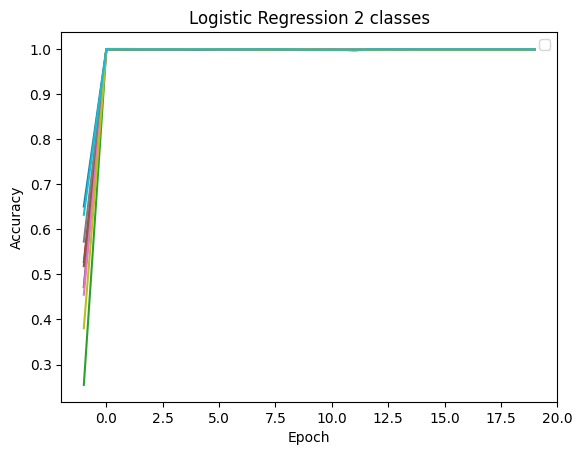

In [18]:
accuracies = []
for i in range(10):
    model_accuracies = []
    network = logistic_regression.Net(NUM_CLASSES_REDUCED)
    _, y_preds, y_true = test.test(test_loader_reduced, network) 
    _, _, acc = get_confidence_interval.get_confidence_interval(y_preds, y_true)
    model_accuracies.append(acc)
    for epoch in range(n_epochs):
        state_dict = torch.load(f'logistic_regression_results/reduced{i}/model{epoch}')
        network.load_state_dict(state_dict)
        _, y_preds, y_true = test.test(test_loader_reduced, network) 
        _, _, acc = get_confidence_interval.get_confidence_interval(y_preds, y_true)
        model_accuracies.append(acc)
    accuracies.append(model_accuracies)
    
for i in range(10):
    plt.plot(np.arange(-1, n_epochs), accuracies[i])
plt.title("Logistic Regression 2 classes")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend() 